In [21]:
# import matplotlib
# matplotlib.use('TkAgg')
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from functools import reduce
import csv
%matplotlib inline
from util import *

In [38]:
# %matplotlib inline
# r=1.01;
# K=2000.;
# params=(r,K);
# r,K=params
# # print(r)
# N0=100;

# def Ndot(N,t,params):
#     r,K=params
#     dN=r*N*(1.0-N/K);
#     return dN;


def Ndot(N,t,params):
    (S,I,R)=N;
    ki,kr=params;
    dS= 0.   -ki*S*I;
    dI=ki*S*I-kr*I;
    dR=kr*I  -0.;
    return (dS,dI,dR)

def vfield(axis,Ndot,num=20,scale=1/0.0015,norm_method='none'):
    xlim=list(axis.get_xlim());
    ylim=list(axis.get_ylim());
    x=np.linspace(xlim[0],xlim[1],num);
    y=np.linspace(ylim[0],ylim[1],num);
    xs,ys=np.meshgrid(x,y);
    us,vs=Ndot((xs,ys),0,params);
    
    ls=(us**2+vs**2)**0.5;        
    if norm_method=='log':
        lls=np.min(np.log(ls),0);
        us=us/ls*lls;
        vs=vs/ls*lls;
    elif norm_method=='len':
        ls=(us**2+vs**2)**0.5;
        us=us/ls;
        vs=vs/ls;
    axis.quiver(xs,ys,us,vs,color='b',scale_units='inches',angles='xy',pivot='mid',scale=scale)




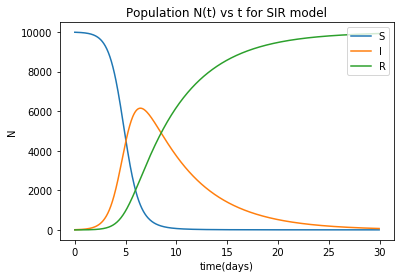

In [63]:
params=(0.00016,0.2);
N0=[(9990,10,0),('S','I','R')];

class intobj():
    def __init__(self,Ndot,N0,params):
        self.fcn=Ndot;
        self.ss,self.labels=N0;
        self.params=params;
    def evo(self,ts):
        self.ts=ts;
        Ns=odeint(self.fcn,self.ss,ts,args=(self.params,));
        intobj.Ns=Ns;
        return(Ns)
    def line(self,ax,idx):
        ax.plot(self.ts,self.Ns[:,idx],label=self.labels[idx]);

        
        
s1=intobj(Ndot,N0,params);
s1.evo(np.arange(0,30,0.05))


plt.close("all");
fig1=plt.figure();
ax=plt.subplot(1,1,1)
for i in range(3):
    s1.line(ax,i)
ax.set_xlabel('time(days)')
ax.set_ylabel('N')
ax.set_title('Population N(t) vs t for SIR model')
ax.legend();
ax.legend(loc=1)
fig1.savefig('task1_q5.png')

# ax.plot(ts,intobj.Ns[:,0],label='S')
# ax.plot(intobj.Ns[:,1],label='I')
# ax.plot(intobj.Ns[:,2],label='R')
# t_max=20;
# num_tsteps=1001
# ts=np.linspace(0,t_max,num_tsteps);
# Ns=odeint(Ndot,N0,ts,args=(params,))

# ax.plot(ts,Ns,'-',label='N(t)')
# vfield(ax,Ndot,20,1/0.0015);

    
# fig1.show()
# help(type(fig1))